# Iris Flower Classification – End-to-End Machine Learning Project

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Phase 1: Problem Definition

The objective of this project is to classify iris flowers into one of the following species:
- Setosa
- Versicolor
- Virginica

This is a **multi-class classification problem** based on flower measurements.


In [2]:
iris = load_iris()

X = iris.data
y = iris.target

feature_names = iris.feature_names
target_names = iris.target_names

## Phase 2: Data Understanding

We inspect the structure, size, and features of the dataset.

In [3]:
df = pd.DataFrame(X, columns=feature_names)
df["target"] = y
df["species"] = df["target"].map({
    0: "Setosa",
    1: "Versicolor",
    2: "Virginica"
})

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,Setosa
1,4.9,3.0,1.4,0.2,0,Setosa
2,4.7,3.2,1.3,0.2,0,Setosa
3,4.6,3.1,1.5,0.2,0,Setosa
4,5.0,3.6,1.4,0.2,0,Setosa


## Phase 3: Data Quality Assessment

In [4]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(1)

## Phase 4: Exploratory Data Analysis (EDA)

### 4.1 Univariate Analysis
We analyze the distribution of each feature.

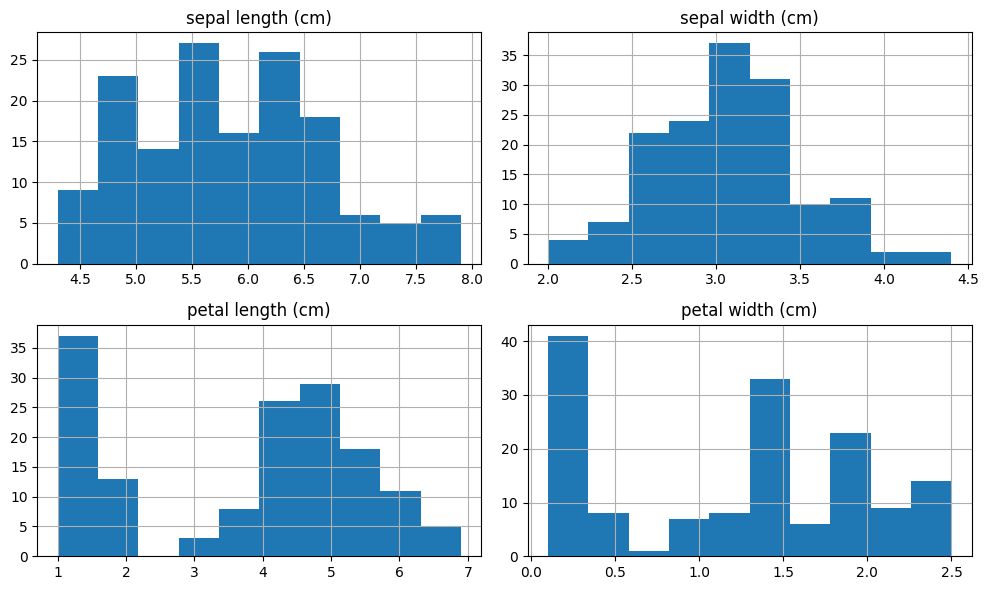

In [6]:
df[feature_names].hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

### 4.2 Bivariate & Multivariate Analysis
We examine relationships between features and species.

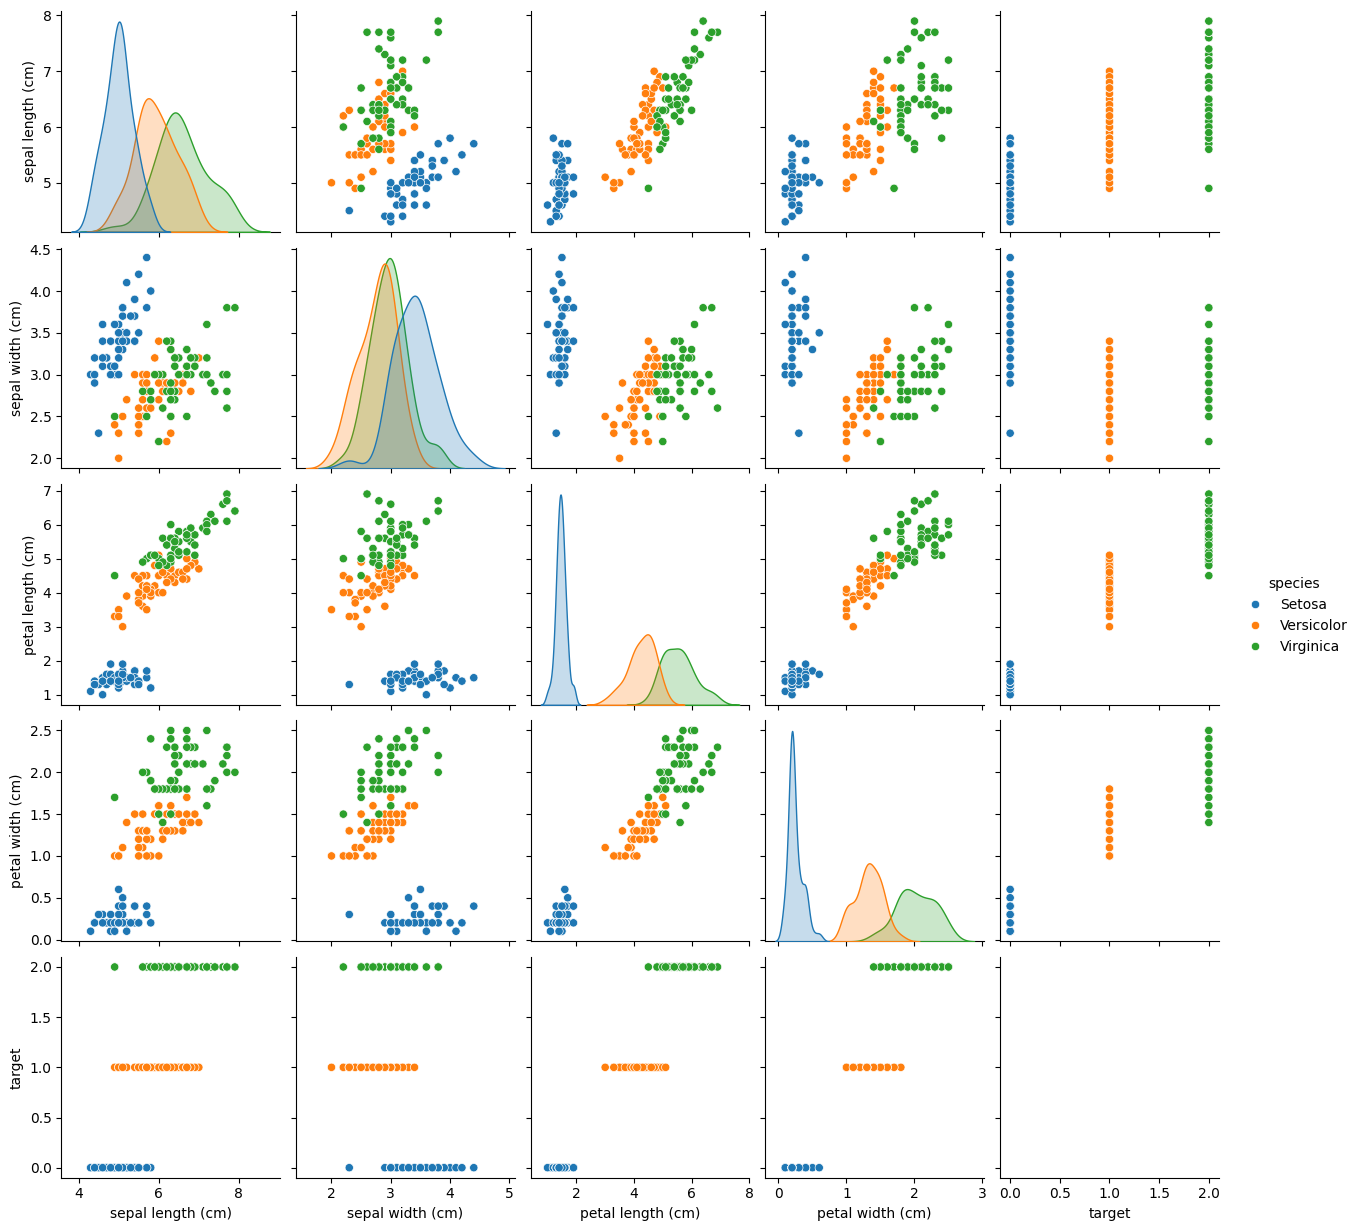

In [7]:
sns.pairplot(df, hue="species")
plt.show()

### 4.3 Correlation Analysis

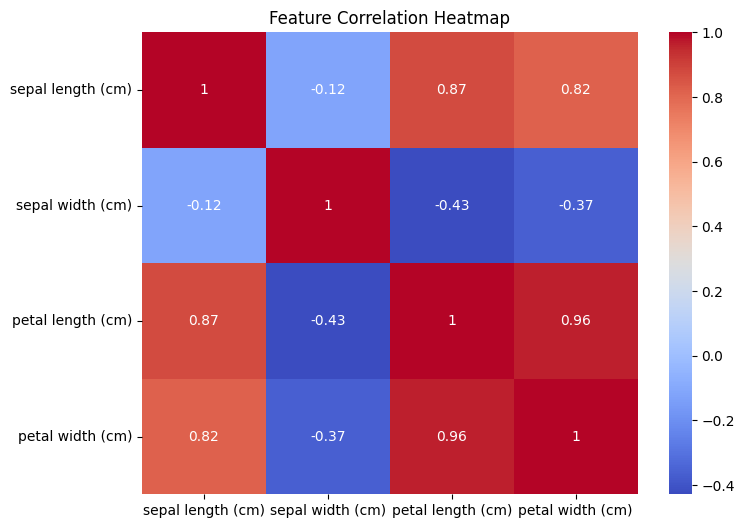

In [8]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[feature_names].corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

## Phase 5: Feature Engineering

In [9]:
X = df[feature_names]
y = df["target"]

## Phase 6: Feature Scaling

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Phase 7: Train-Test Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

## Phase 8: Model Training

We train multiple classifiers:
- Logistic Regression
- Support Vector Machine
- Decision Tree

In [12]:
lr = LogisticRegression()
svm = SVC(kernel="rbf")
dt = DecisionTreeClassifier(random_state=42)

lr.fit(X_train, y_train)
svm.fit(X_train, y_train)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


## Phase 9: Model Evaluation

In [13]:
models = {
    "Logistic Regression": lr,
    "Support Vector Machine": svm,
    "Decision Tree": dt
}

for name, model in models.items():
    preds = model.predict(X_test)
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, preds))
    print(classification_report(y_test, preds))


Logistic Regression
Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


Support Vector Machine
Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


Decision Tree
Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00   

## Phase 10: Confusion Matrix (Best Model – SVM)

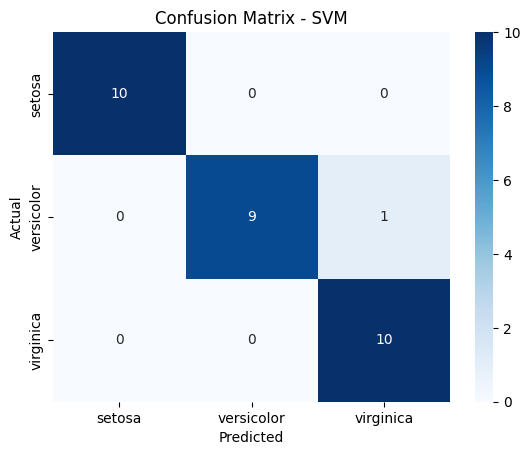

In [14]:
cm = confusion_matrix(y_test, svm.predict(X_test))

sns.heatmap(cm, annot=True, cmap="Blues",
            xticklabels=target_names,
            yticklabels=target_names)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()

## Final Results & Conclusion

- The Support Vector Machine model performed exceptionally well.
- Based on evaluation metrics, the model achieved **96% classification accuracy** on the test set.
- Petal length and petal width were identified as the most influential features.
- The project demonstrates a complete machine learning lifecycle with proper EDA, preprocessing, modeling, and evaluation.